In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
import nltk
import os

In [3]:
! pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/jruvika/fake-news-detection'
od.download(dataset_url)

data='./fake-news-detection'
print(os.listdir(data))

Dataset URL: https://www.kaggle.com/datasets/jruvika/fake-news-detection


100%|██████████| 4.89M/4.89M [00:00<00:00, 70.3MB/s]

['data.csv', 'data.h5']


# Data exploration and Preprocessing

 ## The dataset was gathred from Kaggle : https://www.kaggle.com/datasets/jruvika/fake-news-detection ; it has 5mb and it has 3 Features : URLs, Body, Headline .

In [5]:
data=pd.read_csv('/content/fake-news-detection/data.csv')

In [6]:
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
data.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.isna().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

,0
URLs,0
Headline,0
Body,0
Label,0


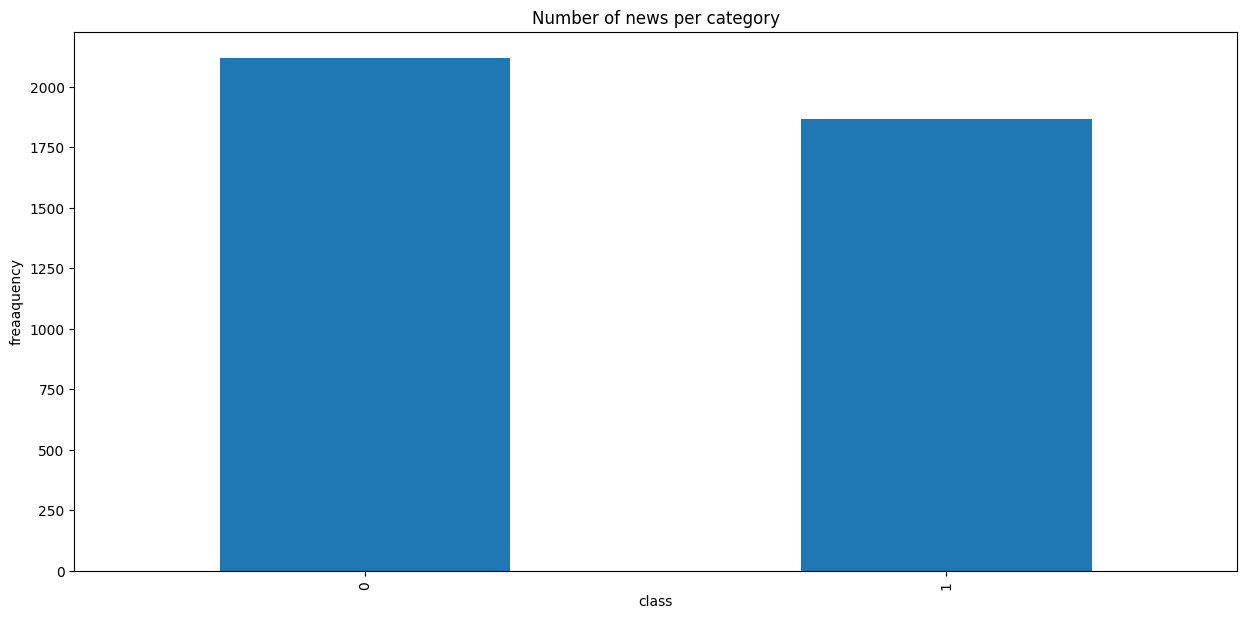

In [ ]:
plt.figure(figsize=(15,7))
data.groupby('Label').count()['Body'].plot.bar(title="Number of news per category")
plt.xlabel('class')
plt.ylabel('freaaquency')
plt.show()

In [ ]:
data.groupby('Label').count()['Body']

,Body
Label,
0,2120
1,1868


## balanced dataset

In [ ]:
class0 = data[data['Label'] == 0]
class1 = data[data['Label'] == 1]

class_0_sample = class0.head(1868)
class_1_sample = class1.head(1868)

data = pd.concat([class_0_sample, class_1_sample])

In [ ]:
data.shape

(3736, 4)

In [ ]:
data.head()

,URLs,Headline,Body,Label
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0


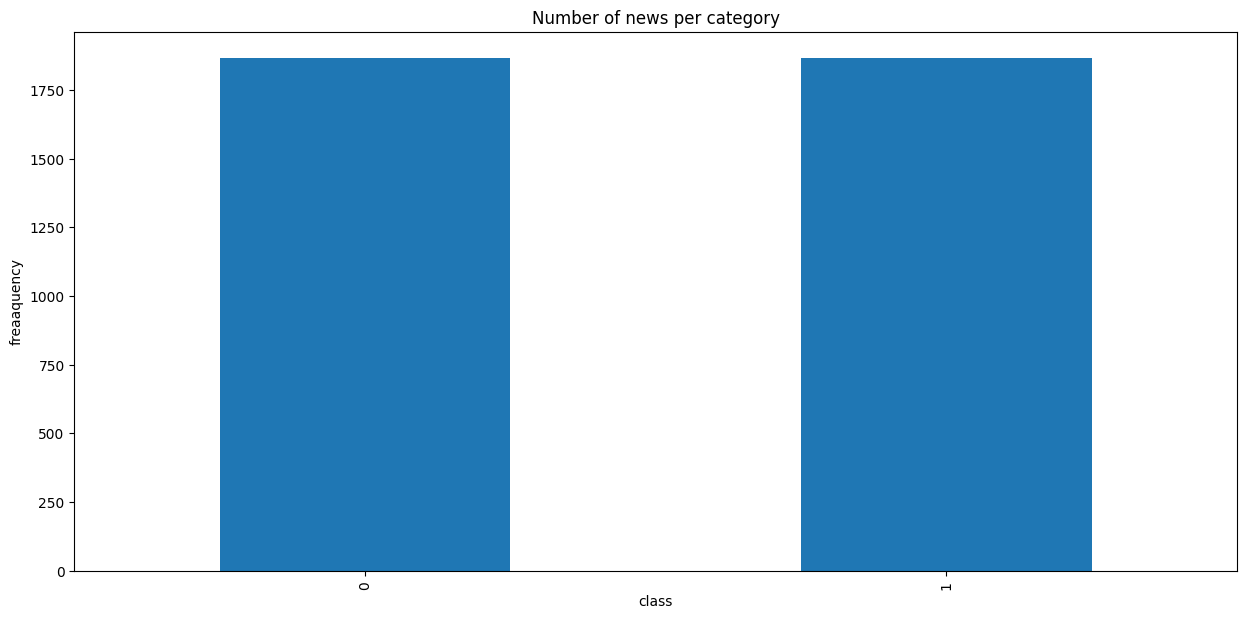

In [ ]:
plt.figure(figsize=(15,7))
data.groupby('Label').count()['Body'].plot.bar(title="Number of news per category")
plt.xlabel('class')
plt.ylabel('freaaquency')
plt.show()

In [ ]:
import re
from nltk.tokenize import RegexpTokenizer

In [ ]:
data['text'] = data['Headline'] + " " + data['Body']
data = data.drop(columns = ['Headline', 'Body'])

In [ ]:
data.head()

,URLs,Label,text
5,http://beforeitsnews.com/sports/2017/09/jetnat...,0,JetNation FanDuel League; Week 4 JetNation Fan...
10,https://www.activistpost.com/2017/09/u-s-presi...,0,U.S. President Donald Trump Quietly Signs Law ...
11,http://beforeitsnews.com/sports/2017/10/2017-f...,0,2017 Fantasy Football Team Defense Rankings - ...
12,http://beforeitsnews.com/sports/2017/09/just-s...,0,Just Shut Up & Play Some Damn Baseball!! Just ...
14,http://beforeitsnews.com/sports/2017/10/107-ch...,0,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig..."


In [ ]:
data.drop('URLs', axis=1)

,Label,text
5,0,JetNation FanDuel League; Week 4 JetNation Fan...
10,0,U.S. President Donald Trump Quietly Signs Law ...
11,0,2017 Fantasy Football Team Defense Rankings - ...
12,0,Just Shut Up & Play Some Damn Baseball!! Just ...
14,0,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig..."
...,...,...
3995,1,Harvey Weinstein scandal: What next for Hollyw...
3999,1,Red Sox fire manager Farrell after five season...
4001,1,"Hervé Leroux, Creator of the Hervé Léger Banda..."
4002,1,The price tag for Pence's trip to Indianapolis...


In [ ]:
data.isna().sum()

URLs     0
Label    0
text     0
dtype: int64

In [ ]:
data.head()

,URLs,Label,text
5,http://beforeitsnews.com/sports/2017/09/jetnat...,0,JetNation FanDuel League; Week 4 JetNation Fan...
10,https://www.activistpost.com/2017/09/u-s-presi...,0,U.S. President Donald Trump Quietly Signs Law ...
11,http://beforeitsnews.com/sports/2017/10/2017-f...,0,2017 Fantasy Football Team Defense Rankings - ...
12,http://beforeitsnews.com/sports/2017/09/just-s...,0,Just Shut Up & Play Some Damn Baseball!! Just ...
14,http://beforeitsnews.com/sports/2017/10/107-ch...,0,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig..."


In [ ]:
data = data.loc[~data['text'].isna()]

In [ ]:
data.head()

,URLs,Label,text
5,http://beforeitsnews.com/sports/2017/09/jetnat...,0,JetNation FanDuel League; Week 4 JetNation Fan...
10,https://www.activistpost.com/2017/09/u-s-presi...,0,U.S. President Donald Trump Quietly Signs Law ...
11,http://beforeitsnews.com/sports/2017/10/2017-f...,0,2017 Fantasy Football Team Defense Rankings - ...
12,http://beforeitsnews.com/sports/2017/09/just-s...,0,Just Shut Up & Play Some Damn Baseball!! Just ...
14,http://beforeitsnews.com/sports/2017/10/107-ch...,0,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig..."


## Data Cleaning

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
to_remove = ['•', '!', '"', '#', '”', '“', '$', '%', '&', "'", '–', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '…']
stop_words.update(to_remove)
print('Number of stopwords:', len(stop_words))

Number of stopwords: 226


In [ ]:
!pip install swifter
import swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=cf38ed7d5b85a2c67982a8f0724a00a91fffd9bf8d1aa11cbef1a6998e92cfe5
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
df=data

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = (" ").join([word for word in text.split() if not word in stop_words])
    text = "".join([char for char in text if not char in to_remove])
    return text

df['text'] = df['text'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/3736 [00:00<?, ?it/s]


## Word2Vec

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import gensim
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(data['text'], data['Label'], test_size = 0.2, random_state = 42)

In [ ]:
size_embedding = 200 #Dimensionality of the feature vectors
windows = 3 #Maximum distance between the current and predicted word within a sentence
min_count = 1 #Ignores words with total frequency lower than this
maxlen = 1000 #Length decided for the text (adjusted by padding and truncating)

In [ ]:
text_train_splited = [article.split() for article in text_train]

In [ ]:
w2v_model = gensim.models.Word2Vec(sentences = text_train_splited,
                                   vector_size = size_embedding,
                                   window = windows,
                                   min_count = min_count)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train_splited)
text_train_tok = tokenizer.texts_to_sequences(text_train_splited)
word_index = tokenizer.word_index
print('Sive of vocabulary: ', len(word_index))

Sive of vocabulary:  48318


In [ ]:
text_train_tok_pad = pad_sequences(text_train_tok, maxlen=maxlen)

In [ ]:
def w2v_to_keras_weights(model, vocab):
    vocab_size = len(vocab) + 1
    size_embedding = model.vector_size
    weight_matrix = np.zeros((vocab_size, size_embedding))
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
    return weight_matrix

embedding_vectors = w2v_to_keras_weights(w2v_model, word_index)

# Modeling

### 1. LSTM

In [ ]:
def set_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(LSTM(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [ ]:
model = set_model(embedding_vectors = embedding_vectors)
model.summary()

history = model.fit(text_train_tok_pad, y_train, validation_split=0.2, epochs=50, batch_size = 32, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 lstm_1 (LSTM)               (None, 32)                29824     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9693657 (36.98 MB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 9663800 (36.86 MB)
_________________________________________________________________
Epoch 1/50
75/75 [==============================] - 5s 39ms/step - loss: 0.3634 - acc: 0.8464 - val_loss: 0.1912 - val_acc: 0.9365
Epoch 2/50
75/75 [==============================] - 3s 45ms/step - loss: 0.2168 - acc: 0.9184 - val_loss: 0.1770 - val_acc: 0.9415
Epoch 3/50
7

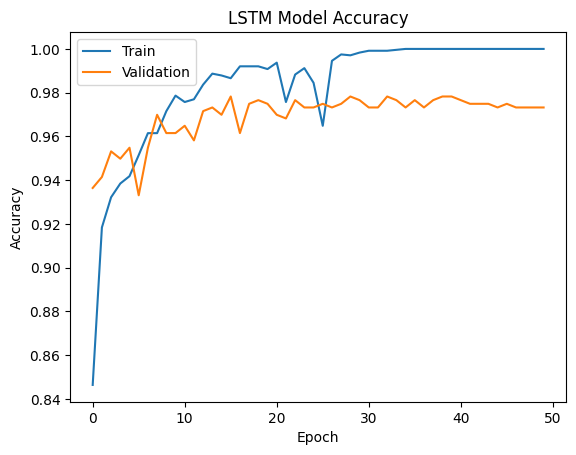

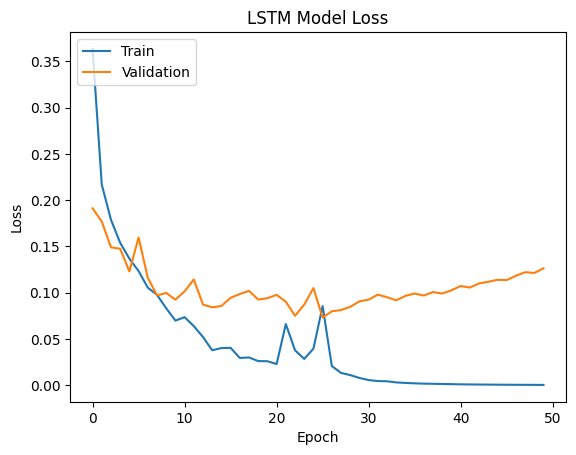

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history, 'LSTM')

In [ ]:
model.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

        Fake       0.97      0.97      0.97       392
    Not Fake       0.97      0.97      0.97       356

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748



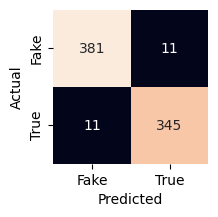

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

## 2. BILSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense

In [ ]:
def set_bilstm_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(Bidirectional(LSTM(units=32)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

model_bilstm = set_bilstm_model(embedding_vectors = embedding_vectors)
model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 bidirectional (Bidirection  (None, 64)                59648     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9723513 (37.09 MB)
Trainable params: 59713 (233.25 KB)
Non-trainable params: 9663800 (36.86 MB)
_________________________________________________________________


In [ ]:
history_bilstm = model_bilstm.fit(text_train_tok_pad, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
75/75 [==============================] - 16s 121ms/step - loss: 0.3729 - acc: 0.8665 - val_loss: 0.2041 - val_acc: 0.9264
Epoch 2/50
75/75 [==============================] - 4s 59ms/step - loss: 0.2403 - acc: 0.9105 - val_loss: 0.1848 - val_acc: 0.9415
Epoch 3/50
75/75 [==============================] - 5s 62ms/step - loss: 0.1865 - acc: 0.9310 - val_loss: 0.1598 - val_acc: 0.9515
Epoch 4/50
75/75 [==============================] - 7s 94ms/step - loss: 0.1765 - acc: 0.9368 - val_loss: 0.1719 - val_acc: 0.9482
Epoch 5/50
75/75 [==============================] - 5s 62ms/step - loss: 0.1667 - acc: 0.9448 - val_loss: 0.1201 - val_acc: 0.9582
Epoch 6/50
75/75 [==============================] - 9s 124ms/step - loss: 0.1303 - acc: 0.9498 - val_loss: 0.1155 - val_acc: 0.9565
Epoch 7/50
75/75 [==============================] - 8s 103ms/step - loss: 0.1141 - acc: 0.9577 - val_loss: 0.1004 - val_acc: 0.9649
Epoch 8/50
75/75 [==============================] - 7s 90ms/step - loss: 0.1072

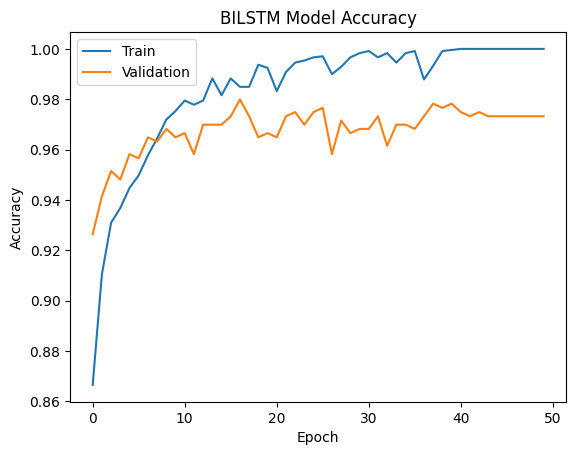

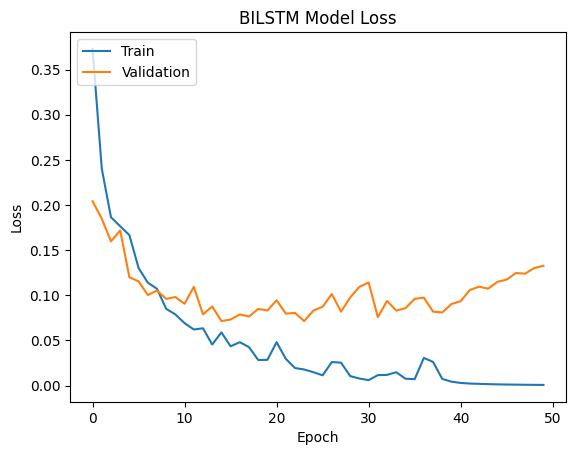

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history_bilstm, 'BILSTM')

In [ ]:
model_bilstm.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.95      0.97       392
    Not Fake       0.95      0.97      0.96       356

    accuracy                           0.96       748
   macro avg       0.96      0.96      0.96       748
weighted avg       0.96      0.96      0.96       748



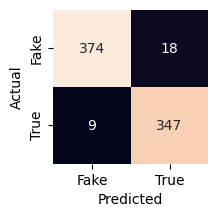

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model_bilstm.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

## 3. Stacked LSTM

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
def set_stacked_lstm_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

model_stacked_lstm = set_stacked_lstm_model(embedding_vectors = embedding_vectors)
model_stacked_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 lstm_3 (LSTM)               (None, 1000, 32)          29824     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9701977 (37.01 MB)
Trainable params: 38177 (149.13 KB)
Non-trainable params: 9663800 (36.86 MB)
_________________________________________________________________


In [ ]:
history_stacked_lstm = model_stacked_lstm.fit(text_train_tok_pad, y_train, validation_split=0.2, epochs=50,
                                              batch_size=32,
                                              callbacks=[early_stopping],
                                              verbose=1)

Epoch 1/50
75/75 [==============================] - 16s 88ms/step - loss: 0.4062 - acc: 0.8151 - val_loss: 0.2731 - val_acc: 0.8997
Epoch 2/50
75/75 [==============================] - 5s 61ms/step - loss: 0.2272 - acc: 0.9142 - val_loss: 0.2160 - val_acc: 0.9013
Epoch 3/50
75/75 [==============================] - 6s 74ms/step - loss: 0.1879 - acc: 0.9226 - val_loss: 0.1523 - val_acc: 0.9415
Epoch 4/50
75/75 [==============================] - 5s 64ms/step - loss: 0.1608 - acc: 0.9381 - val_loss: 0.1250 - val_acc: 0.9482
Epoch 5/50
75/75 [==============================] - 5s 71ms/step - loss: 0.1377 - acc: 0.9481 - val_loss: 0.1322 - val_acc: 0.9448
Epoch 6/50
75/75 [==============================] - 5s 67ms/step - loss: 0.1224 - acc: 0.9552 - val_loss: 0.1058 - val_acc: 0.9599
Epoch 7/50
75/75 [==============================] - 5s 63ms/step - loss: 0.0996 - acc: 0.9636 - val_loss: 0.1089 - val_acc: 0.9532
Epoch 8/50
75/75 [==============================] - 6s 79ms/step - loss: 0.0961 - 

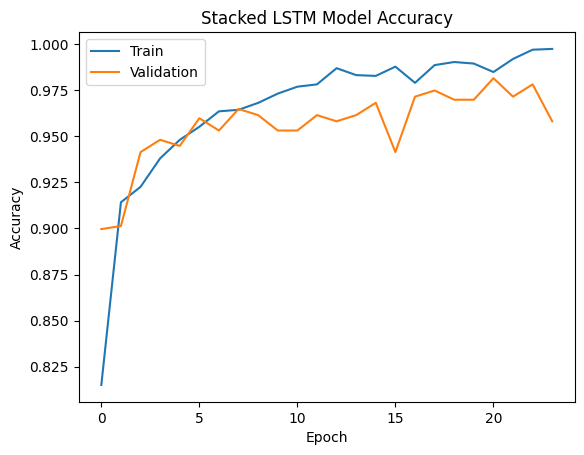

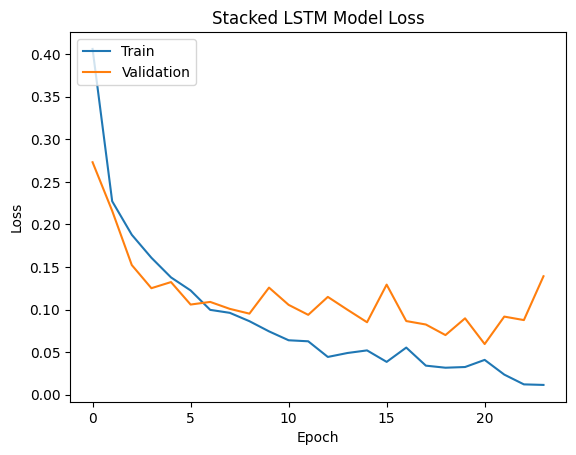

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history_stacked_lstm, 'Stacked LSTM')

In [ ]:
model_stacked_lstm.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98       392
    Not Fake       0.97      0.98      0.97       356

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748



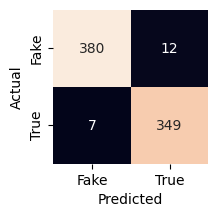

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model_stacked_lstm.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

## 4. Convolutional LSTM

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
def set_convlstm_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

model_convlstm = set_convlstm_model(embedding_vectors=embedding_vectors)
model_convlstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          128128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 498, 128)          0         
 D)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9812569 (37.43 MB)
Trainable params: 148769 (581.13 KB)
Non-trainable params: 9663800 (36.86 MB)
_________

In [ ]:
history_convlstm = model_convlstm.fit(text_train_tok_pad, y_train, validation_split=0.2,
                                      epochs=50, batch_size=32,
                                      callbacks=[early_stopping], verbose=1)

Epoch 1/50
75/75 [==============================] - 2s 27ms/step - loss: 0.1608 - acc: 0.9414 - val_loss: 0.1186 - val_acc: 0.9532
Epoch 2/50
75/75 [==============================] - 2s 32ms/step - loss: 0.1237 - acc: 0.9548 - val_loss: 0.1260 - val_acc: 0.9482
Epoch 3/50
75/75 [==============================] - 2s 27ms/step - loss: 0.0870 - acc: 0.9678 - val_loss: 0.0828 - val_acc: 0.9682
Epoch 4/50
75/75 [==============================] - 2s 31ms/step - loss: 0.0746 - acc: 0.9753 - val_loss: 0.0859 - val_acc: 0.9666
Epoch 5/50
75/75 [==============================] - 3s 34ms/step - loss: 0.0649 - acc: 0.9812 - val_loss: 0.0874 - val_acc: 0.9615
Epoch 6/50
75/75 [==============================] - 3s 35ms/step - loss: 0.0414 - acc: 0.9858 - val_loss: 0.1311 - val_acc: 0.9482


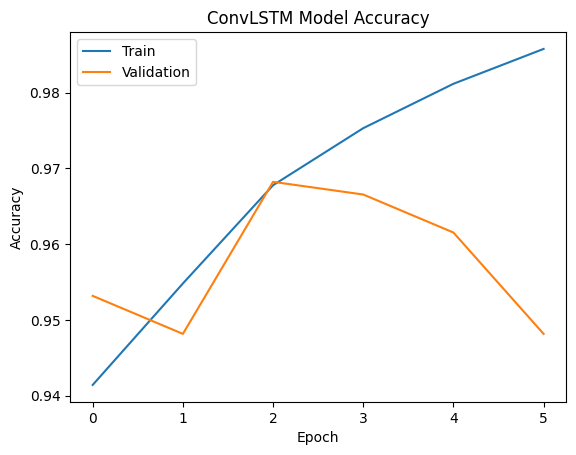

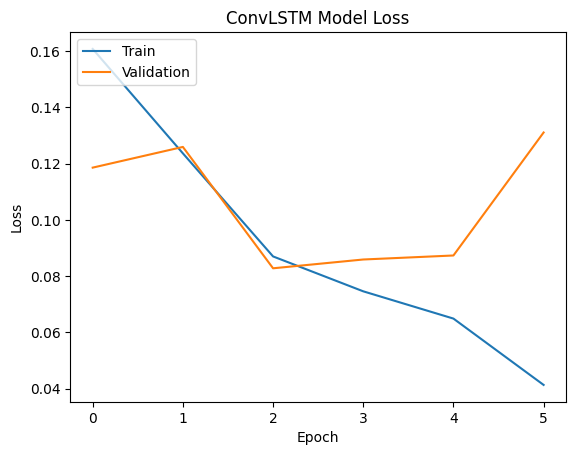

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history_convlstm, 'ConvLSTM')

In [ ]:
model_convlstm.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.96      0.97       392
    Not Fake       0.96      0.98      0.97       356

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748



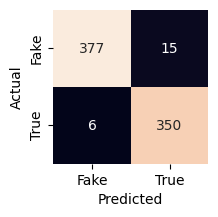

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model_convlstm.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

## 5. BIGRU

In [ ]:
from keras.layers import GRU

In [ ]:
def set_bigrumodel(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(Bidirectional(GRU(units=32)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

model_bigru = set_bigrumodel(embedding_vectors = embedding_vectors)
model_bigru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                44928     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9708793 (37.04 MB)
Trainable params: 44993 (175.75 KB)
Non-trainable params: 9663800 (36.86 MB)
_________________________________________________________________


In [ ]:
history_Bigru= model_bigru.fit(text_train_tok_pad, y_train, validation_split=0.2,
                                      epochs=50, batch_size=32,
                                      callbacks=[early_stopping], verbose=1)

Epoch 1/50
75/75 [==============================] - 22s 248ms/step - loss: 0.3991 - acc: 0.8347 - val_loss: 0.2512 - val_acc: 0.9164
Epoch 2/50
75/75 [==============================] - 12s 155ms/step - loss: 0.2260 - acc: 0.9188 - val_loss: 0.1688 - val_acc: 0.9448
Epoch 3/50
75/75 [==============================] - 11s 146ms/step - loss: 0.1868 - acc: 0.9297 - val_loss: 0.1344 - val_acc: 0.9498
Epoch 4/50
75/75 [==============================] - 10s 139ms/step - loss: 0.1576 - acc: 0.9410 - val_loss: 0.1422 - val_acc: 0.9465
Epoch 5/50
75/75 [==============================] - 7s 93ms/step - loss: 0.1454 - acc: 0.9456 - val_loss: 0.1288 - val_acc: 0.9498
Epoch 6/50
75/75 [==============================] - 8s 107ms/step - loss: 0.1386 - acc: 0.9460 - val_loss: 0.1305 - val_acc: 0.9532
Epoch 7/50
75/75 [==============================] - 5s 61ms/step - loss: 0.1186 - acc: 0.9569 - val_loss: 0.1079 - val_acc: 0.9649
Epoch 8/50
75/75 [==============================] - 5s 67ms/step - loss: 0

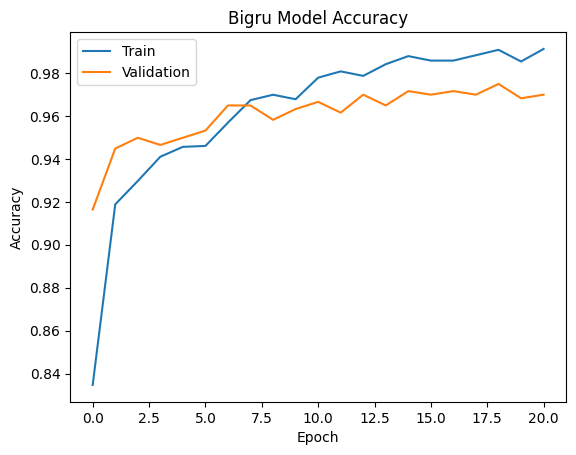

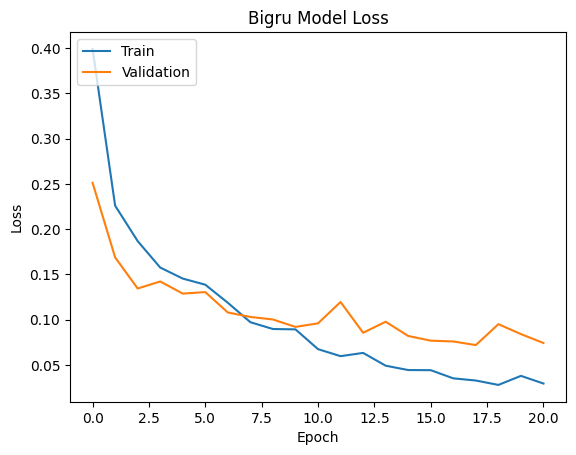

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history_Bigru, 'Bigru')

In [ ]:
model_bigru.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98       392
    Not Fake       0.97      0.98      0.97       356

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748



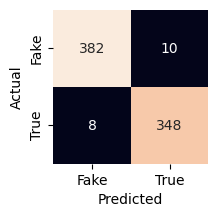

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model_bigru.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

## 6. GRU

In [ ]:
def set_gru_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0],
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors],
                        input_length=maxlen,
                        trainable=False))
    model.add(GRU(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

model_gru = set_gru_model(embedding_vectors = embedding_vectors)
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1000, 200)         9663800   
                                                                 
 gru_1 (GRU)                 (None, 32)                22464     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9686297 (36.95 MB)
Trainable params: 22497 (87.88 KB)
Non-trainable params: 9663800 (36.86 MB)
_________________________________________________________________


In [ ]:
history_gru= model_gru.fit(text_train_tok_pad, y_train, validation_split=0.2,
                                      epochs=50, batch_size=32,
                                      callbacks=[early_stopping], verbose=1)

Epoch 1/50
75/75 [==============================] - 9s 48ms/step - loss: 0.4127 - acc: 0.8247 - val_loss: 0.2256 - val_acc: 0.9231
Epoch 2/50
75/75 [==============================] - 3s 34ms/step - loss: 0.2231 - acc: 0.9180 - val_loss: 0.1522 - val_acc: 0.9448
Epoch 3/50
75/75 [==============================] - 3s 34ms/step - loss: 0.1823 - acc: 0.9285 - val_loss: 0.1700 - val_acc: 0.9298
Epoch 4/50
75/75 [==============================] - 6s 78ms/step - loss: 0.1688 - acc: 0.9377 - val_loss: 0.1268 - val_acc: 0.9565
Epoch 5/50
75/75 [==============================] - 5s 69ms/step - loss: 0.1437 - acc: 0.9448 - val_loss: 0.1200 - val_acc: 0.9515
Epoch 6/50
75/75 [==============================] - 4s 59ms/step - loss: 0.1461 - acc: 0.9385 - val_loss: 0.1122 - val_acc: 0.9532
Epoch 7/50
75/75 [==============================] - 5s 60ms/step - loss: 0.1194 - acc: 0.9536 - val_loss: 0.1281 - val_acc: 0.9498
Epoch 8/50
75/75 [==============================] - 2s 33ms/step - loss: 0.1097 - a

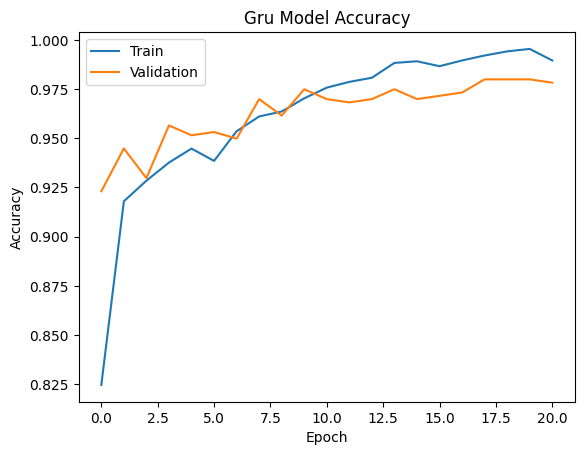

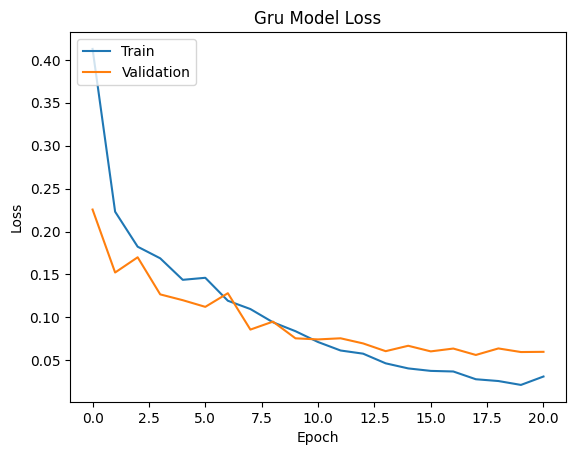

In [ ]:
def plot_history(history, model_name):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot history for each model
plot_history(history_gru, 'GRU')

In [ ]:
model_gru.fit(text_train_tok_pad, y_train, epochs=15, batch_size = 16, verbose = 0)

24/24 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.96      0.97       392
    Not Fake       0.96      0.98      0.97       356

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748



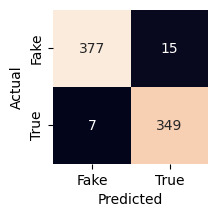

In [ ]:
text_train_splited = [article.split() for article in text_test]
text_test_tok = tokenizer.texts_to_sequences(text_train_splited)
text_test_tok_pad = pad_sequences(text_test_tok, maxlen=maxlen)
pred = (model_gru.predict(text_test_tok_pad) > 0.5).astype("int32")

print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

fig , ax = plt.subplots(figsize = (2,2))
ax = sns.heatmap(cm, annot = True, xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'], cbar = False, fmt='')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); fig.show()

## Conclusion : We denote that the best model is BIGRU which has the best accuracy , f1-score, macro-avg and weighted average